In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import load_img
from ann_visualizer.visualize import ann_viz

Using TensorFlow backend.
W0916 18:58:39.242398 140735713981312 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
seed = 7
np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)


In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [6]:
def larger_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(img_cols, img_rows, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
model = larger_model()

W0916 18:58:39.866230 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 18:58:39.891252 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 18:58:39.894676 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 18:58:39.906800 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0916 18:58:39.928531 140735713981312 deprecation_w

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

W0916 18:59:03.086361 140735713981312 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.3854 - acc: 0.8822 - val_loss: 0.0802 - val_acc: 0.9757
Epoch 2/10
60000/60000 [==============================] - 46s 763us/step - loss: 0.1002 - acc: 0.9690 - val_loss: 0.0604 - val_acc: 0.9787
Epoch 3/10
60000/60000 [==============================] - 46s 765us/step - loss: 0.0728 - acc: 0.9776 - val_loss: 0.0407 - val_acc: 0.9863
Epoch 4/10
60000/60000 [==============================] - 46s 771us/step - loss: 0.0586 - acc: 0.9817 - val_loss: 0.0351 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 46s 773us/step - loss: 0.0494 - acc: 0.9844 - val_loss: 0.0356 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.0443 - acc: 0.9860 - val_loss: 0.0284 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.0382 - acc: 0.9881 - val_loss: 0.

In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Accuracy: %.2f%%" % (scores[1]*100))

Large CNN Accuracy: 99.17%


In [23]:
ann_viz(model, title='A CNN model to identify handwritten digits')

In [24]:
model.save('mnist.model')

In [25]:
model_json = model.to_json()

with open("model.json", 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('model.h5')
print('Saved model to disk')

Saved model to disk


In [26]:
img = load_img('test.jpg')

In [27]:
img.size

(240, 300)

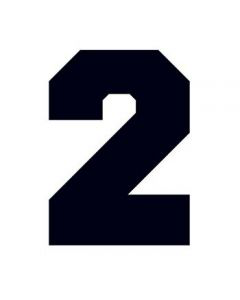

In [28]:
img

In [36]:
img = np.resize(img,(28,28))
img = np.reshape(img,[1,28,28, 1])

In [37]:
pred= model.predict([img])

In [38]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [39]:
val = np.argmax(pred)

In [40]:
val

8